In [142]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


* Load Data
* EDA
    * Pregnancies 
    * Glucose 
    * Blood Pressure 
    * Skin Thickness 
    * Insulin 
    * BMI 
    * DiabetesPedigreeFunction 
    * Age
* Data Cleaning
    * Imputing Data
    * Spliting Data
    * Scaling Data
* ML
    * Hyper Parameters Tuning 

# Load Data

In [143]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [144]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [145]:
df.shape

(768, 9)

In [146]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [147]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [148]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No need for cleaning! (except for dealing with outliers)

# EDA

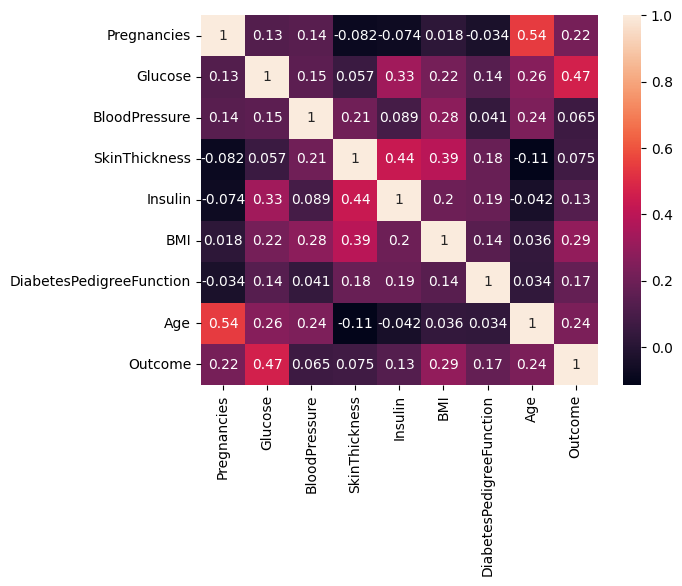

In [149]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [150]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Pregnancies

In [151]:
df['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [152]:
print('AVG Pregnancies: ',df['Pregnancies'].mean())
print('Mode of Pregnancies: ',df['Pregnancies'].mode()[0])
print('Median of Pregnancies: ', df['Pregnancies'].median())

AVG Pregnancies:  3.8450520833333335
Mode of Pregnancies:  1
Median of Pregnancies:  3.0


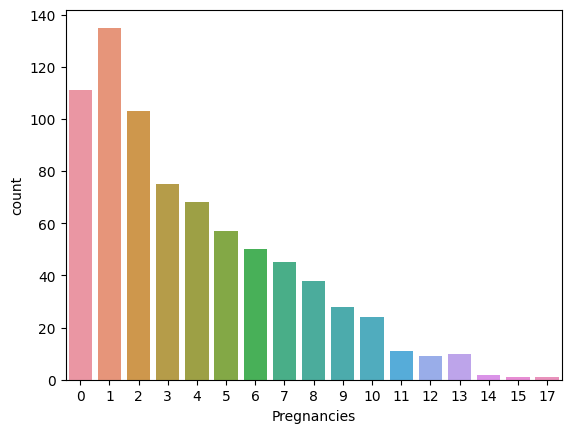

In [153]:
sns.countplot(x='Pregnancies', data=df)
plt.show()

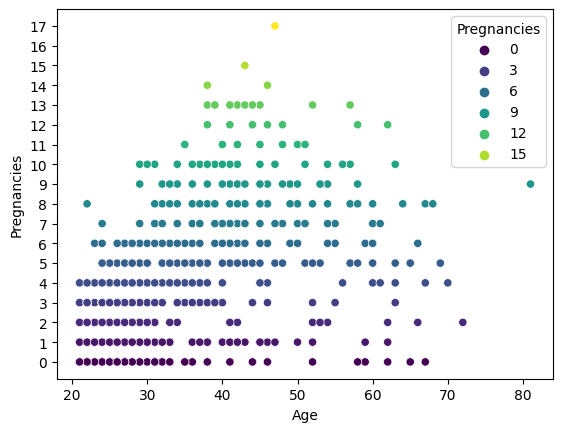

In [154]:
sns.scatterplot(df, x='Age', y='Pregnancies', hue='Pregnancies', palette='viridis')
plt.yticks(range(int(df['Pregnancies'].min()), int(df['Pregnancies'].max()) + 1))
plt.show()

In [155]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Glucose

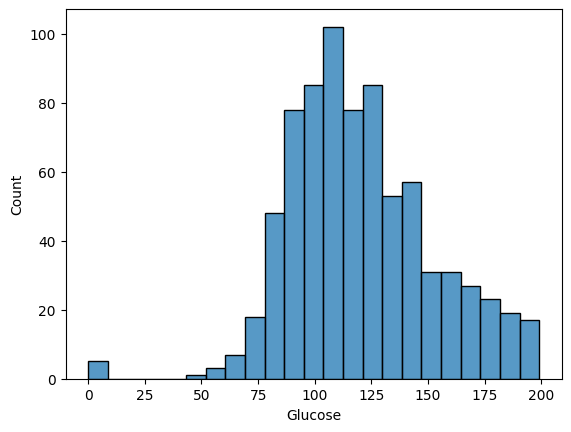

In [156]:
sns.histplot(df, x='Glucose')
plt.show()

<Axes: ylabel='Glucose'>

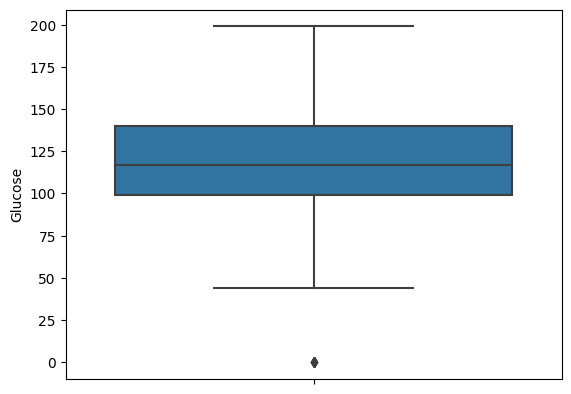

In [157]:
sns.boxplot(df, y='Glucose')

## Blood Pressure

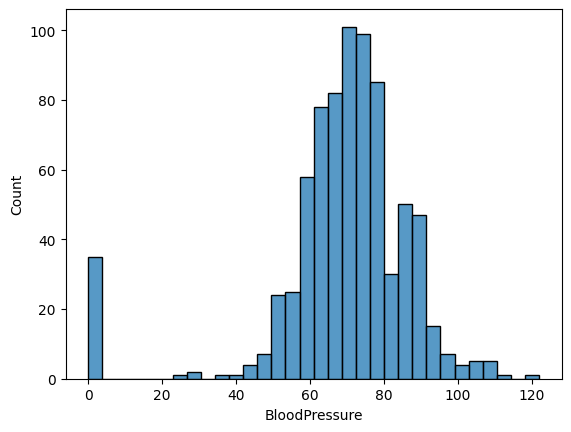

In [158]:
sns.histplot(df, x='BloodPressure')
plt.show()

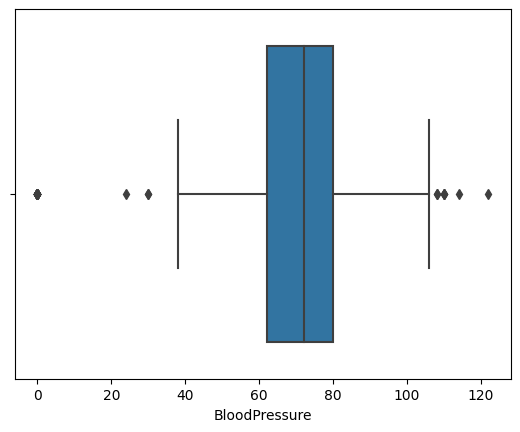

In [159]:
sns.boxplot(df, x='BloodPressure')
plt.show()

## Skin Thickness

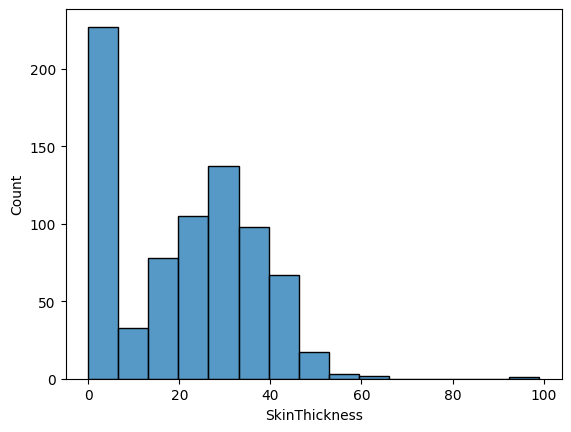

In [160]:
sns.histplot(df, x='SkinThickness')
plt.show()

<Axes: ylabel='SkinThickness'>

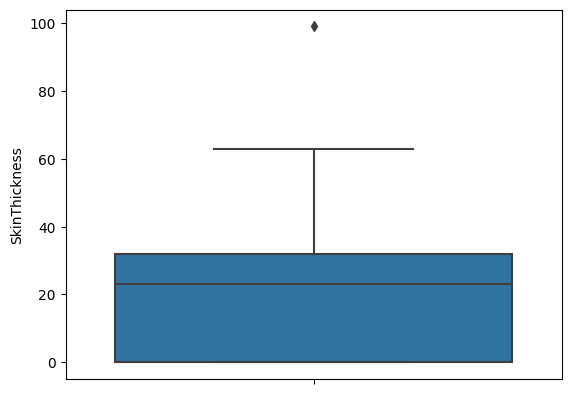

In [161]:
sns.boxplot(df, y='SkinThickness')

## Insulin

In [162]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


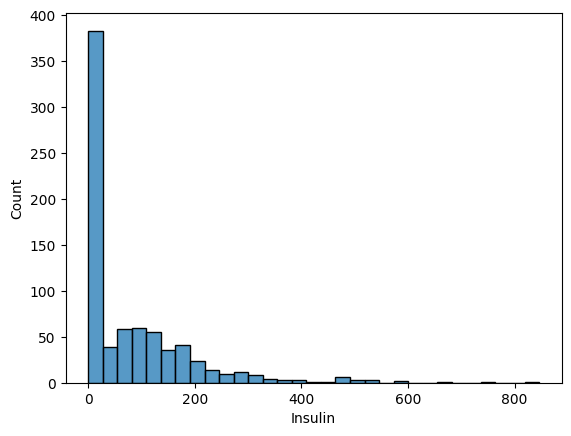

In [163]:
sns.histplot(df, x='Insulin')
plt.show()

<Axes: ylabel='Insulin'>

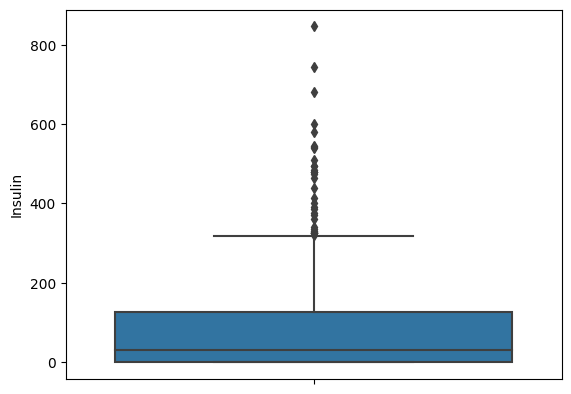

In [164]:
sns.boxplot(df, y='Insulin')

## BMI

<Axes: xlabel='BMI', ylabel='Count'>

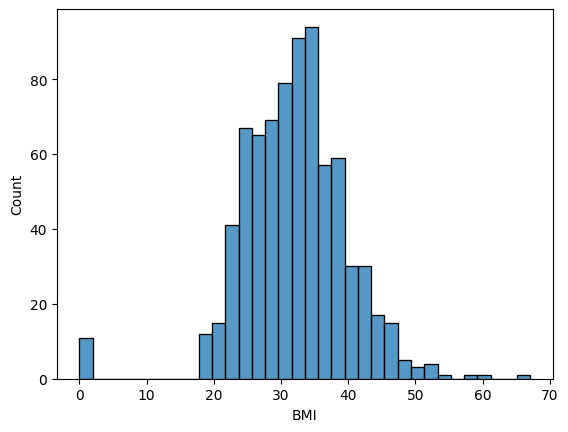

In [165]:
sns.histplot(df, x='BMI')

<Axes: ylabel='BMI'>

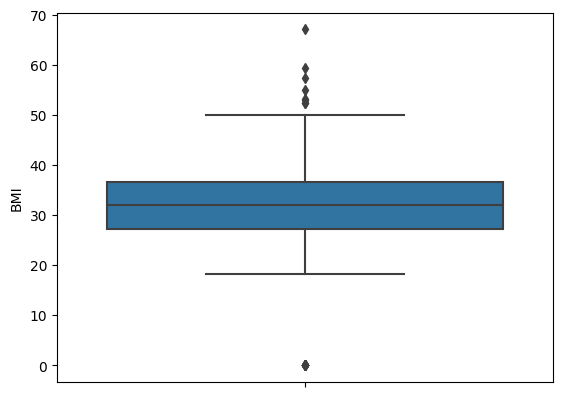

In [166]:
sns.boxplot(df, y='BMI')

## DiabetesPedigreeFunction

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

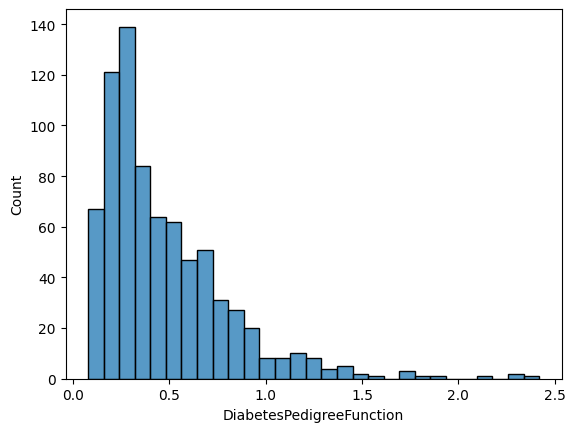

In [167]:
sns.histplot(df, x='DiabetesPedigreeFunction')

<Axes: ylabel='DiabetesPedigreeFunction'>

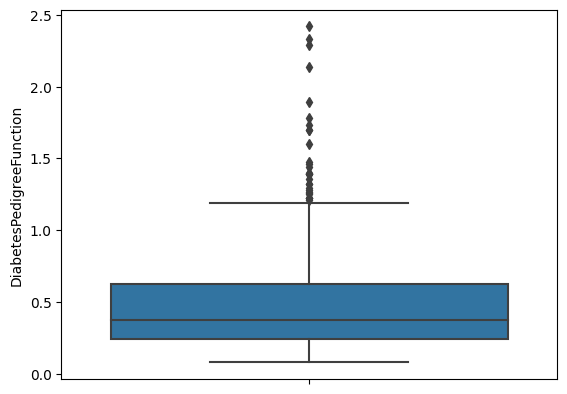

In [168]:
sns.boxplot(df, y='DiabetesPedigreeFunction')

## Age

<Axes: xlabel='Age', ylabel='Count'>

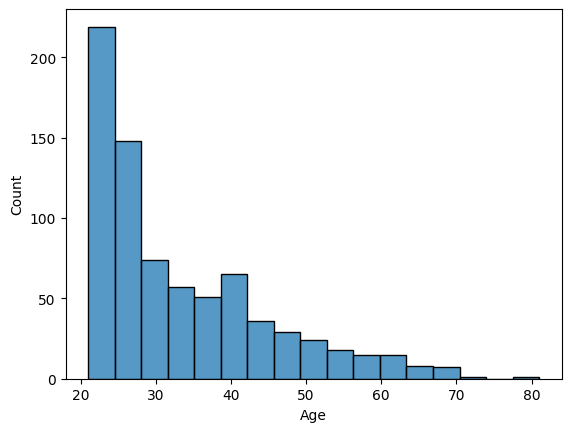

In [169]:
sns.histplot(df, x='Age')

In [170]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Cleaning

## Imputing Data

In [171]:
from sklearn.impute import SimpleImputer

def impute_zero_values(df, col_name):

    df[col_name].replace(0, None, inplace=True)
    
    imputer = SimpleImputer(strategy='median')

    
    df[[col_name]] = imputer.fit_transform(df[[col_name]])

    return df
    

In [172]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns:
    df = impute_zero_values(df, col)

In [173]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

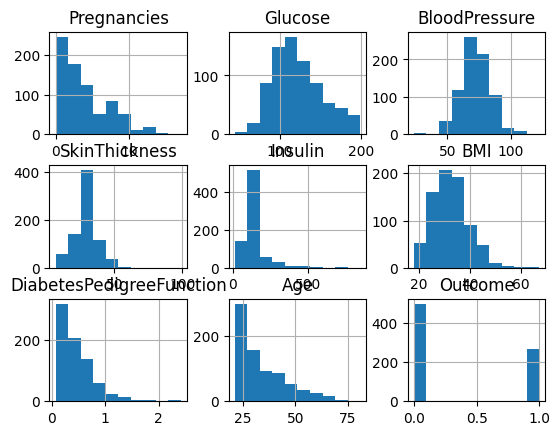

In [174]:
df.hist()

## Spliting the Data

In [175]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=19)

## Scaling the Data

In [176]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

# ML

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


models = {
    'Logistics Regression': LogisticRegression(random_state=1),
    'Random Forest Classifier': RandomForestClassifier(random_state=1),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=1),
    'KNeighbors Classifier': KNeighborsClassifier()
}

In [178]:
from sklearn.metrics import accuracy_score

results = []
for model_name, model in models.items():

    model.fit(X_scaled, y_train)

    y_pred = model.predict(X_scaled_test)

    acc = accuracy_score(y_test, y_pred)
        
    results.append((model_name, acc))

    print(f'{model_name} Accuracy: {acc:.4f}')

Logistics Regression Accuracy: 0.7706
Random Forest Classifier Accuracy: 0.7835
Decision Tree Classifier Accuracy: 0.6753
KNeighbors Classifier Accuracy: 0.7662


In [179]:
best_model_name, best_model_acc = max(results, key=lambda x: x[1])
best_model_name, best_model_acc

('Random Forest Classifier', 0.7835497835497836)

## Hyper Parameters Tuning

In [180]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(rfc, param_grid=params, scoring='accuracy',cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_scaled, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: user 484 ms, sys: 38.3 ms, total: 522 ms
Wall time: 10.5 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [10, 15, 20]},
             scoring='accuracy', verbose=2)

In [181]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'log_loss', 'min_samples_leaf': 6, 'min_samples_split': 15}
Best Cross-Validation Score: 0.7578400830737279


In [182]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_scaled_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.8008658008658008
[CV] END criterion=log_loss, min_samples_leaf=4, min_samples_split=15; total time=   0.3s
[CV] END criterion=log_loss, min_samples_leaf=4, min_samples_split=20; total time=   0.3s
[CV] END criterion=log_loss, min_samples_leaf=6, min_samples_split=10; total time=   0.3s
[CV] END criterion=log_loss, min_samples_leaf=6, min_samples_split=10; total time=   0.3s
[CV] END criterion=log_loss, min_samples_leaf=6, min_samples_split=15; total time=   0.3s
[CV] END criterion=log_loss, min_samples_leaf=6, min_samples_split=20; total time=   0.6s
[CV] END criterion=log_loss, min_samples_leaf=8, min_samples_split=10; total time=   0.5s
[CV] END criterion=log_loss, min_samples_leaf=8, min_samples_split=15; total time=   0.5s
[CV] END criterion=log_loss, min_samples_leaf=8, min_samples_split=20; total time=   0.4s
[CV] END criterion=gini, min_samples_leaf=4, min_samples_split=10; total time=   0.3s
[CV] END criterion=gini, min_samples_leaf=4, min_samples_split=15; tot